<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [96]:
#Write code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [97]:
# Load the data
file_location = r'C:\Users\opi\Desktop\python training\Project 2\HR Churn Prediction Project-2\HR_comma_sep.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_location)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [98]:
# Find the shape
shape = df.shape
print("Shape of the DataFrame: ", shape)

Shape of the DataFrame:  (14999, 10)


In [99]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [100]:
# Find the data types of columns
column_data_types = df.dtypes
print("Data types of columns:\n", column_data_types)


Data types of columns:
 satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object


In [101]:
# Find the basic statistics
df.describe()
#print("Basic Statistics:\n", statistics)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [102]:
# Find the null values
null_values = df.isnull().sum()
print("Null Values:\n", null_values)

Null Values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64


# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Find out the how many employees left the company?**

In [103]:
# Count of how many employees left the company
left_count = df['left'].value_counts()
num_employees_left = left_count[1]  
print("Number of employees who left the company:", num_employees_left)


Number of employees who left the company: 3571


In [104]:
#using sum
num_employees_left = df['left'].sum()  
print("Number of employees who left the company:", num_employees_left)


Number of employees who left the company: 3571


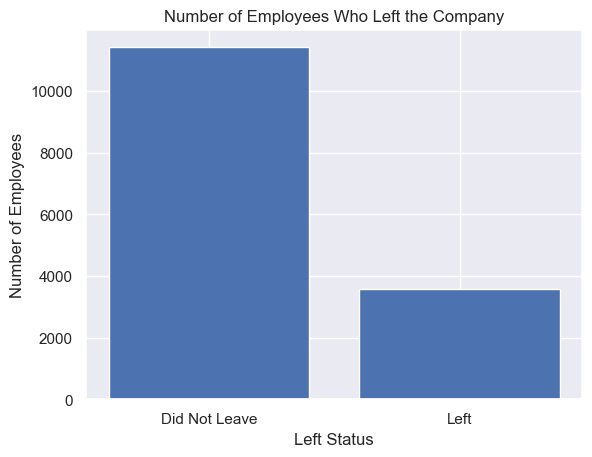

In [105]:
import matplotlib.pyplot as plt

left_count = df['left'].value_counts()

# Create a bar plot
plt.bar(left_count.index, left_count.values)

# Set labels for the x and y axes
plt.xlabel('Left Status')
plt.ylabel('Number of Employees')

# Set x-axis tick labels
plt.xticks(left_count.index, ['Did Not Leave', 'Left'])

# Add a title
plt.title('Number of Employees Who Left the Company')

# Show the plot
plt.show()


**Question:What can you interpret from the plot above?** 

Answer: it tells only fewer left the company compared to who did not leave

**Task 3: Find out the number of projects being handled.**

In [106]:
# Write code here
project_counts = df['number_project'].value_counts()
print("Number of projects being handled:")
print(project_counts)

Number of projects being handled:
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64


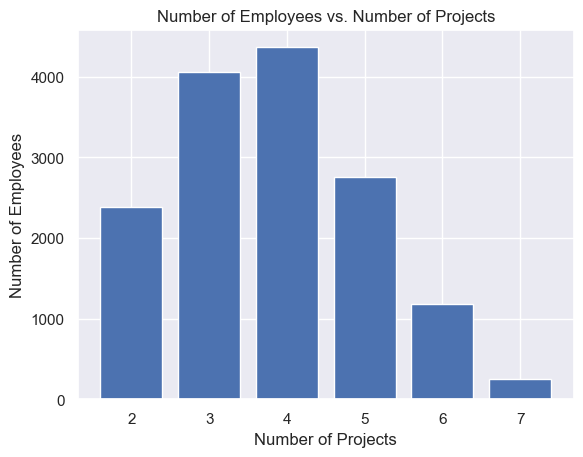

In [107]:
import matplotlib.pyplot as plt

# Count the number of employees for each number of projects
project_counts = df['number_project'].value_counts()

# Sort the counts by the number of projects (optional, for clarity)
project_counts = project_counts.sort_index()

# Create a bar plot
plt.bar(project_counts.index, project_counts.values)

# Set labels for the x and y axes
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')

# Add a title
plt.title('Number of Employees vs. Number of Projects')

# Show the plot
plt.show()


**Question: What insights can you infer from the above plot?**

Answer: there more than 4000 employees who have done 4 projects and only 256 employees have done 7 projects so far.

**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>

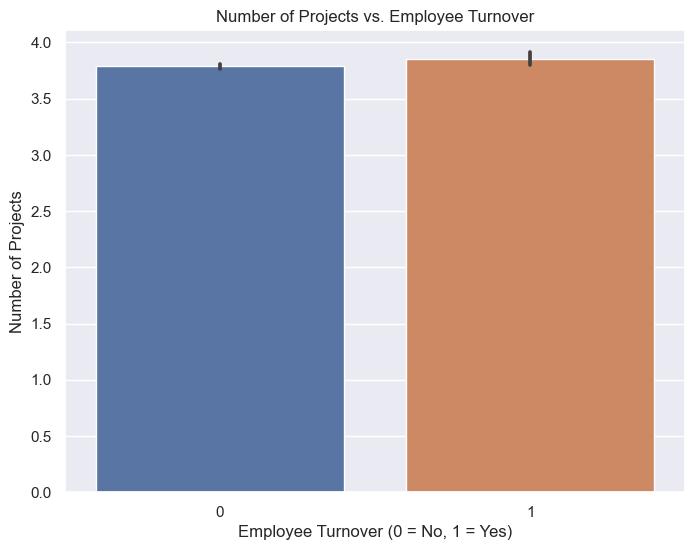

In [12]:
grouped = df.groupby('left')

plt.figure(figsize=(8, 6))
sns.barplot(x='left', y='number_project', data=df)
plt.title('Number of Projects vs. Employee Turnover')
plt.xlabel('Employee Turnover (0 = No, 1 = Yes)')
plt.ylabel('Number of Projects')
plt.show()

**Task 5:** Make a plot of your findings (only turn-over employees)

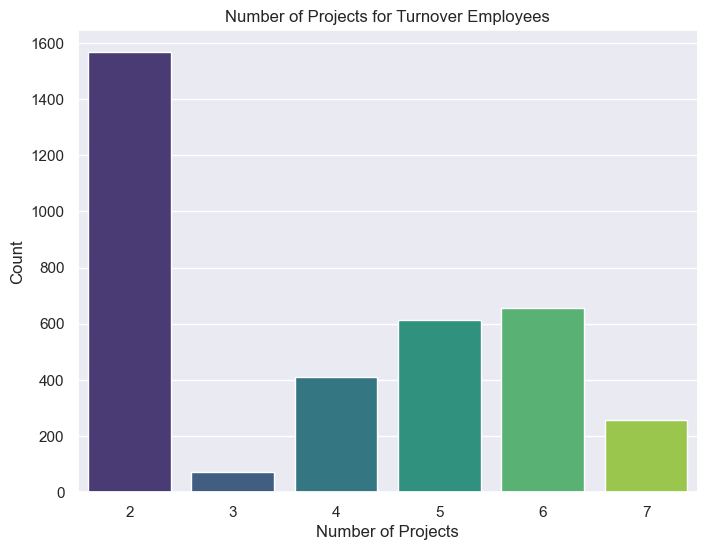

In [13]:
turnover_df = df[df['left'] == 1]

# Create a count plot to visualize the distribution of "number_project" for turnover employees
plt.figure(figsize=(8, 6))
sns.countplot(x='number_project', data=turnover_df, palette='viridis')
plt.title('Number of Projects for Turnover Employees')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.show()

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer: The graph shows that the number of employees leaving the company increases as the number of projects they are working on increases. This suggests that employees who are overloaded with work are more likely to leave the company.

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

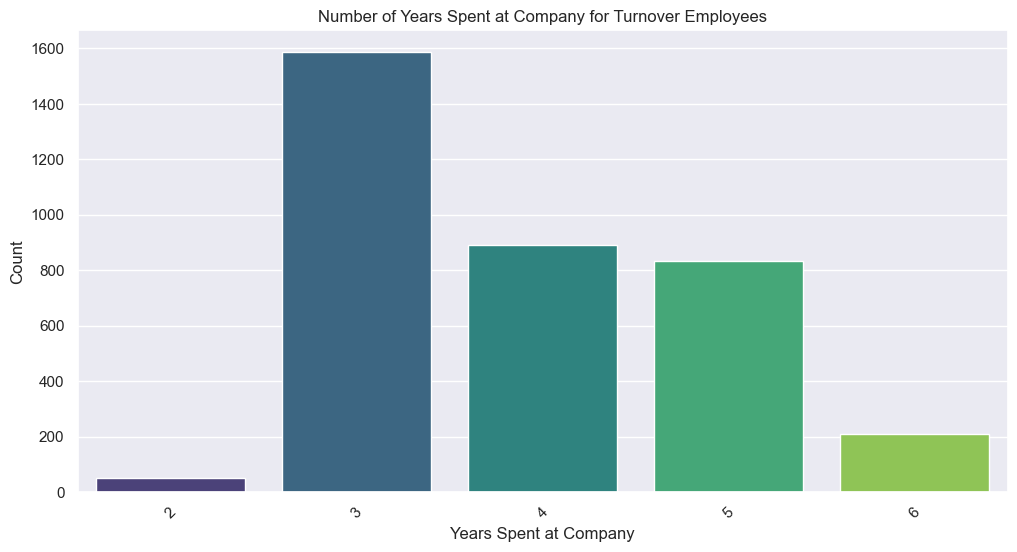

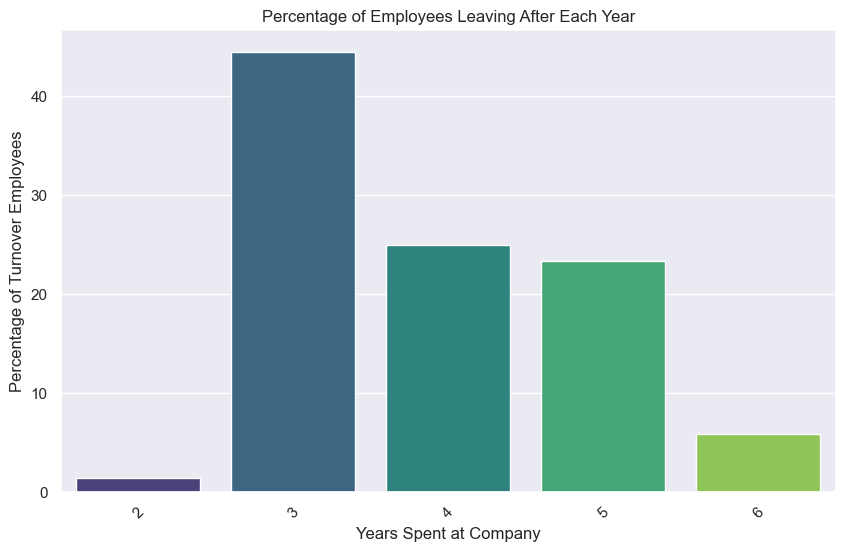

In [14]:
# Show the plot for the count of years here

# Filter the DataFrame to include only employees who left (turnover employees)
turnover_df = df[df['left'] == 1]

# Create a count plot to visualize the distribution of "time_spend_company" for turnover employees
plt.figure(figsize=(12, 6))
sns.countplot(x='time_spend_company', data=turnover_df, palette='viridis')
plt.title('Number of Years Spent at Company for Turnover Employees')
plt.xlabel('Years Spent at Company')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Calculate the percentage of employees who left the company after each year
years_count = turnover_df['time_spend_company'].value_counts().sort_index()
total_turnover = len(turnover_df)
percentage_leaving = (years_count / total_turnover) * 100

# Create a bar plot to show the percentage of employees leaving after each year
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_leaving.index, y=percentage_leaving.values, palette='viridis')
plt.title('Percentage of Employees Leaving After Each Year')
plt.xlabel('Years Spent at Company')
plt.ylabel('Percentage of Turnover Employees')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Question: What is the maximum number of time spend by the employees?**

Answer: 3

In [15]:
# Write the code here to get the percentage of employees leaving.
# Calculate the percentage of employees who left the company
total_employees = len(df)
turnover_employees = len(df[df['left'] == 1])

percentage_leaving = (turnover_employees / total_employees) * 100

print(f"Percentage of employees leaving: {percentage_leaving:.2f}%")


Percentage of employees leaving: 23.81%


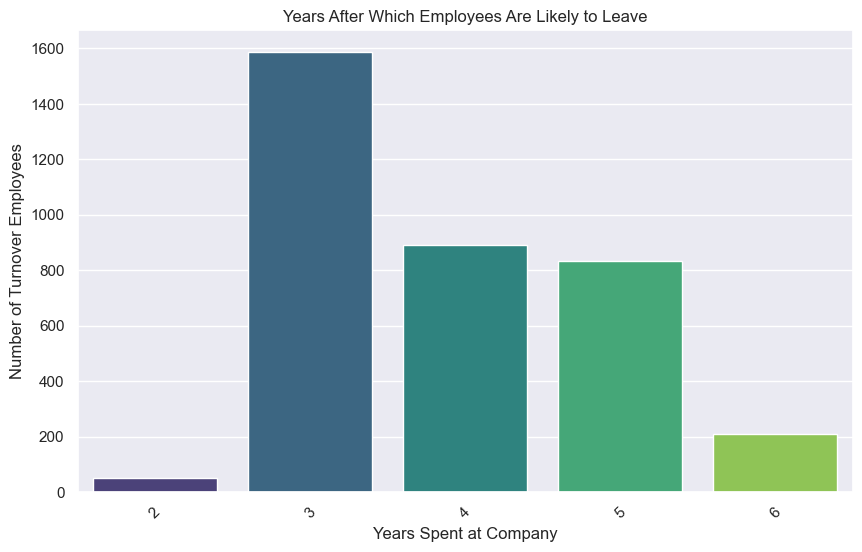

In [16]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only employees who left (turnover employees)
turnover_df = df[df['left'] == 1]

# Calculate the count of employees who left after each number of years spent at the company
years_count = turnover_df['time_spend_company'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=years_count.index, y=years_count.values, palette='viridis')
plt.title('Years After Which Employees Are Likely to Leave')
plt.xlabel('Years Spent at Company')
plt.ylabel('Number of Turnover Employees')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


**Question: After what time period are employees most likely to leave the company ?**

Answer: Based on the graph, employees are most likely to leave the company after 5 years. The number of employees who leave the company peaks at around 5 years, and then gradually decreases. This suggests that there is something about the 5-year mark that makes employees more likely to leave.

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

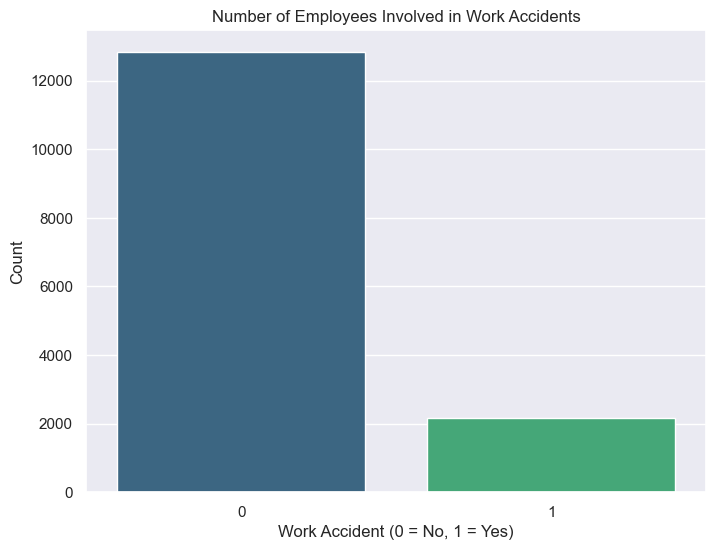

In [17]:
# Number of employees involved in work accident
plt.figure(figsize=(8, 6))
sns.countplot(x='Work_accident', data=df, palette='viridis')
plt.title('Number of Employees Involved in Work Accidents')
plt.xlabel('Work Accident (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**Question: What can you conclude from the graph above?**

Answer: this graph shows that 2000 employees have been in work accident

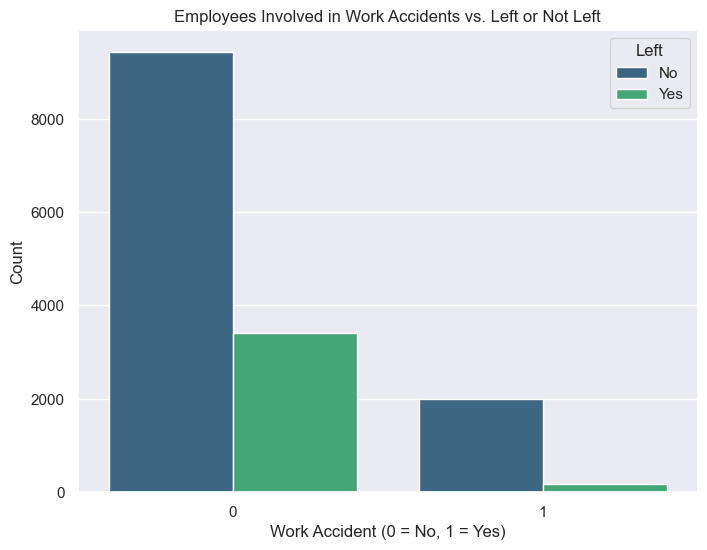

In [18]:
# Number of employees involved in work accident and left or not left
plt.figure(figsize=(8, 6))
sns.countplot(x='Work_accident', hue='left', data=df, palette='viridis')
plt.title('Employees Involved in Work Accidents vs. Left or Not Left')
plt.xlabel('Work Accident (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Left', labels=['No', 'Yes'])
plt.show()

## **Promotions in last 5 years**

**Task 8: How many number of employees got the promotion in last 5 year and how many of them left?**

In [19]:
# Write code here
# Count the number of employees who got a promotion in the last 5 years
promoted_employees = len(df[df['promotion_last_5years'] == 1])

# Count the number of employees who got a promotion in the last 5 years and left
left_after_promotion = len(df[(df['promotion_last_5years'] == 1) & (df['left'] == 1)])

print(f"Number of employees who got a promotion in the last 5 years: {promoted_employees}")
print(f"Number of employees who got a promotion and left: {left_after_promotion}")


Number of employees who got a promotion in the last 5 years: 319
Number of employees who got a promotion and left: 19


Answer: 

## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

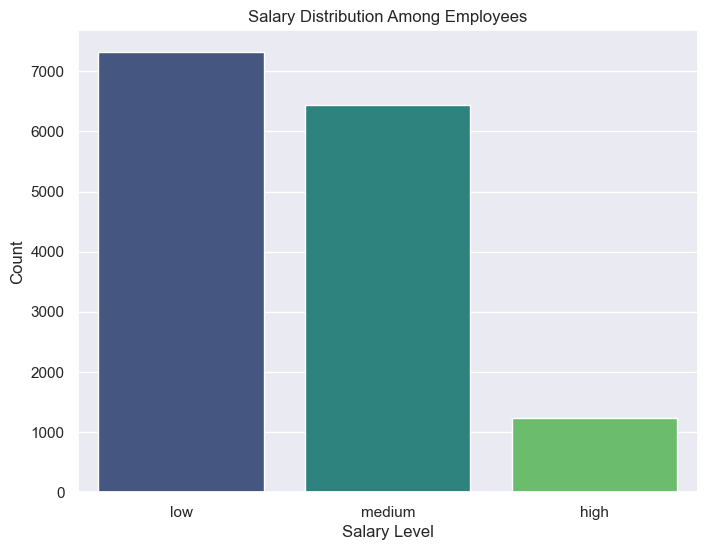

In [20]:
#Write code here
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot to visualize the salary distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', data=df, palette='viridis')
plt.title('Salary Distribution Among Employees')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.show()


Answer: The salary trends in the data are as follows:

The majority of employees (7000) have a salary in the medium range.
There are fewer employees with low salaries (1000) and high salaries (2000).
There is a slight skew towards the medium salary range, suggesting that most employees are paid a fair wage.
There is no clear trend over time, suggesting that salaries have remained relatively stable in recent years.

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

In [21]:
# Write code here
# Calculate the percentage of employees who left for each salary level
percentage_left_by_salary = df.groupby('salary')['left'].mean() * 100

print("Percentage of Employees Who Left by Salary Level:")
print(percentage_left_by_salary)


Percentage of Employees Who Left by Salary Level:
salary
high       6.628941
low       29.688354
medium    20.431275
Name: left, dtype: float64


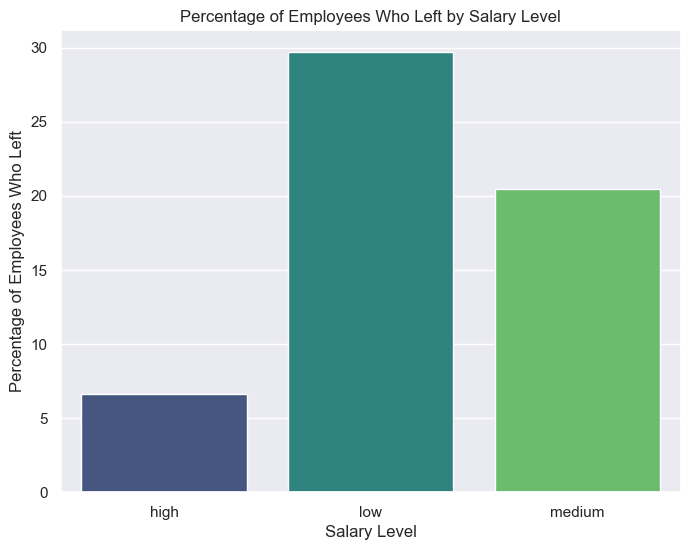

In [22]:
# Write code here for plot
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of employees who left for each salary level
percentage_left_by_salary = df.groupby('salary')['left'].mean() * 100

# Create a bar plot to show the percentage of employees who left based on their salary levels
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_left_by_salary.index, y=percentage_left_by_salary.values, palette='viridis')
plt.title('Percentage of Employees Who Left by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Percentage of Employees Who Left')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


**Question: What does the above plot show?**

Answer: it shows about percentage of employees who left the company due to very low salary

## **Employees per Department**

**Task 10: Find out employees per department and also see which which department has highest number of employees leaving the company.**

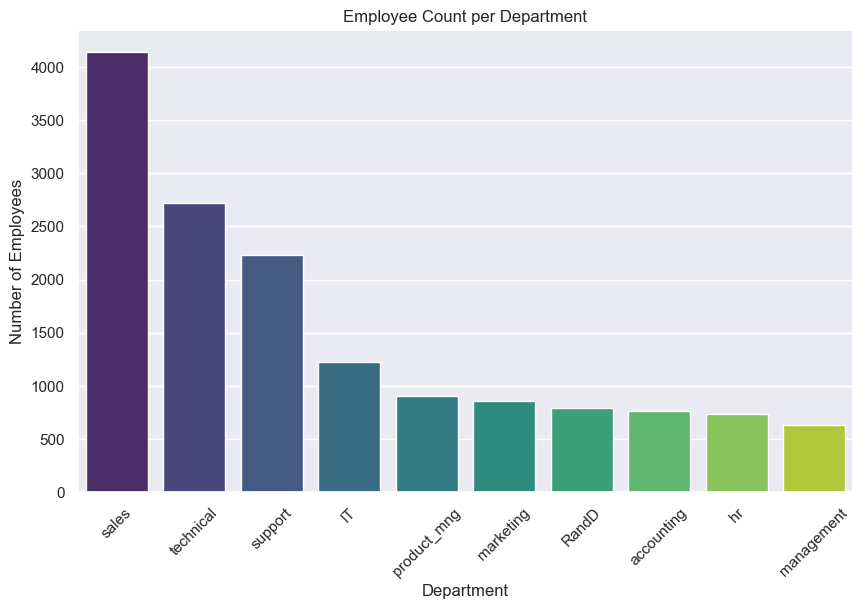

Employee Count per Department:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

Department with Highest Number of Employees Leaving the Company: sales


In [23]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the employee count per department
department_employee_count = df['dept'].value_counts()

# Create a bar plot to visualize the employee count in each department
plt.figure(figsize=(10, 6))
sns.barplot(x=department_employee_count.index, y=department_employee_count.values, palette='viridis')
plt.title('Employee Count per Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Find the department with the highest number of employees leaving the company
department_with_highest_turnover = df[df['left'] == 1]['dept'].value_counts().idxmax()

print("Employee Count per Department:")
print(department_employee_count)
print("\nDepartment with Highest Number of Employees Leaving the Company:", department_with_highest_turnover)


**Question: Which department has maximum number of employees?**

Answer: sales

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

In [24]:
# Write code here


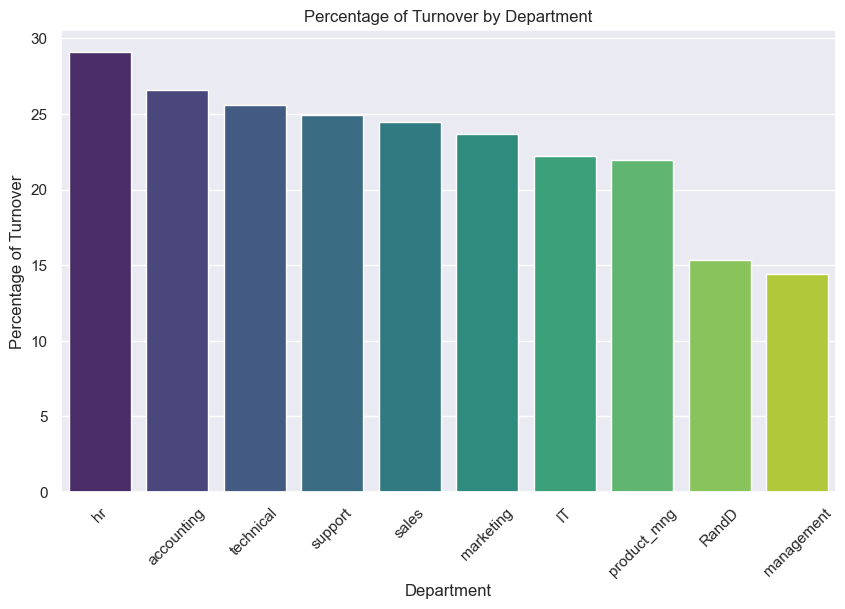

Percentage of Turnover by Department:
dept
hr             29.093369
accounting     26.597132
technical      25.625000
support        24.899058
sales          24.492754
marketing      23.659674
IT             22.249389
product_mng    21.951220
RandD          15.374841
management     14.444444
Name: left, dtype: float64

Department with Highest Percentage of Turnover: hr


In [25]:
# Write code here to draw the plot
department_turnover_percentage = (df.groupby('dept')['left'].mean() * 100).sort_values(ascending=False)

# Create a bar plot to visualize department-wise turnover percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=department_turnover_percentage.index, y=department_turnover_percentage.values, palette='viridis')
plt.title('Percentage of Turnover by Department')
plt.xlabel('Department')
plt.ylabel('Percentage of Turnover')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Find the department with the highest percentage of turnover
department_highest_turnover_percentage = department_turnover_percentage.idxmax()

print("Percentage of Turnover by Department:")
print(department_turnover_percentage)
print("\nDepartment with Highest Percentage of Turnover:", department_highest_turnover_percentage)

Answer: hr

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

C:\Users\opi\AppData\Local\Temp\ipykernel_15904\2612327012.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['left'] == 1]['satisfaction_level'], label='Left', shade=True, color='red')
C:\Users\opi\AppData\Local\Temp\ipykernel_15904\2612327012.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['left'] == 0]['satisfaction_level'], label='Not Left', shade=True, color='green')


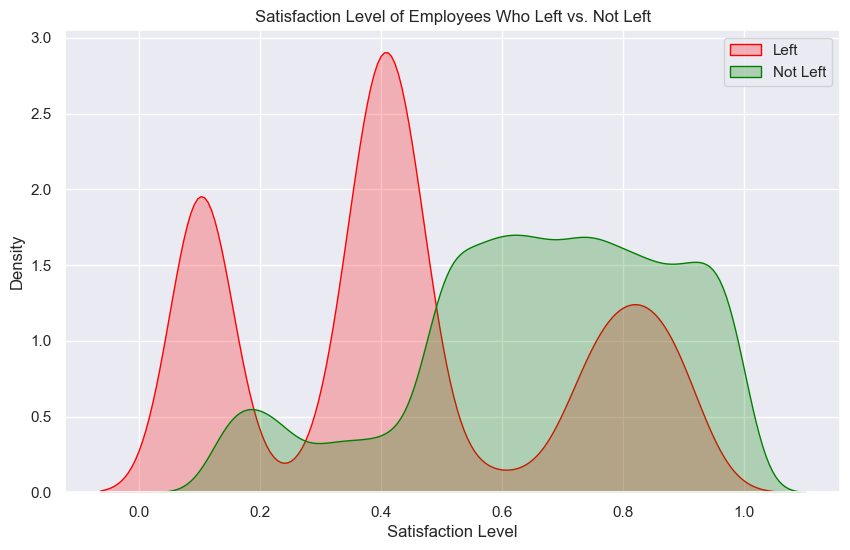

In [26]:
# Write the code here
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KDE plot for satisfaction levels of employees who left and those who didn't leave
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['left'] == 1]['satisfaction_level'], label='Left', shade=True, color='red')
sns.kdeplot(df[df['left'] == 0]['satisfaction_level'], label='Not Left', shade=True, color='green')
plt.title('Satisfaction Level of Employees Who Left vs. Not Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.legend()
plt.show()


**Question: What can you conclude from the plot above?**

Answer: The plot shows that employees who left the company are more likely to have a lower satisfaction level than employees who did not leave the company. This suggests that employee satisfaction is a significant factor in employee retention.

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [27]:
# Write the code here to make bins as mentioned above
df['satisfaction_level_type'] = df['satisfaction_level'].apply(lambda x: 'High' if x >= 0.5 else 'Low')

# Display the updated DataFrame
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low


**Task 13: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

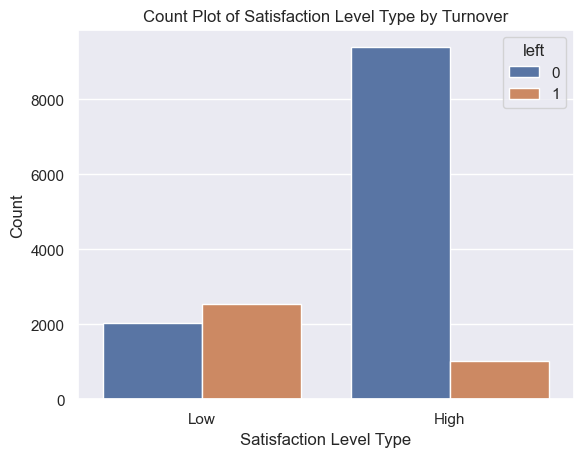

In [28]:
# Write Code Here
sns.countplot(data=df, x='satisfaction_level_type', hue='left')

# Add labels and title
plt.xlabel('Satisfaction Level Type')
plt.ylabel('Count')
plt.title('Count Plot of Satisfaction Level Type by Turnover')

# Show the plot
plt.show()

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

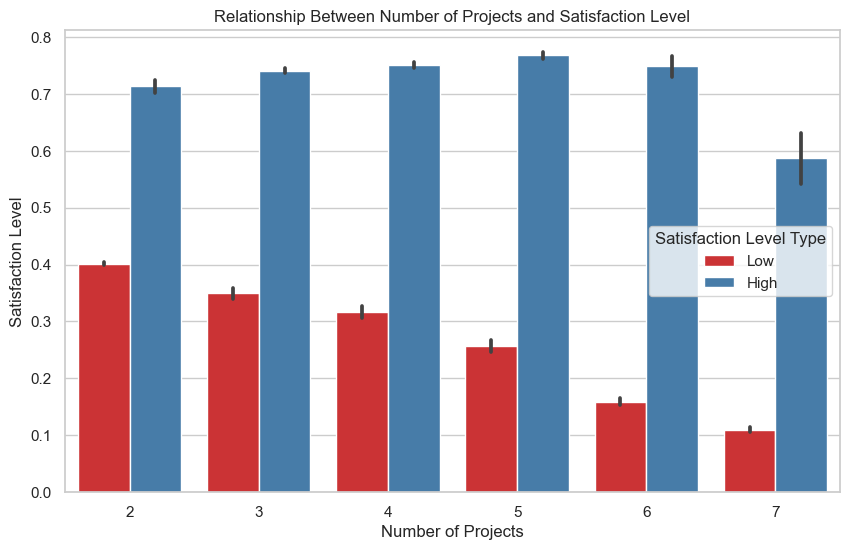

In [29]:
# Write Code Here
# Create a new column 'satisfaction_level_type'
df['satisfaction_level_type'] = df['satisfaction_level'].apply(lambda x: 'High' if x >= 0.5 else 'Low')

# Create a scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Separate data into 'High' and 'Low' satisfaction level types
sns.barplot(data=df, x='number_project', y='satisfaction_level', hue='satisfaction_level_type', palette='Set1')

# Add labels and title
plt.xlabel('Number of Projects')
plt.ylabel('Satisfaction Level')
plt.title('Relationship Between Number of Projects and Satisfaction Level')

# Show the plot
plt.legend(title='Satisfaction Level Type')
plt.show()



**Make a Plot of your findings**

In [30]:
df['satisfaction_level_type'] = df['satisfaction_level'].apply(lambda x: 'High' if x >= 0.5 else 'Low')

# Group the data by 'satisfaction_level_type' and calculate statistics
summary_stats = df.groupby('satisfaction_level_type')[['number_project', 'satisfaction_level']].agg(['mean', 'median', 'std', 'count'])

# Display the summary statistics
summary_stats.head()

number_project                          \
                                  mean median       std  count   
satisfaction_level_type                                          
High                          3.814324    4.0  0.916426  10416   
Low                           3.777438    3.0  1.750163   4583   

                        satisfaction_level                          
                                      mean median       std  count  
satisfaction_level_type                                             
High                              0.748778   0.75  0.141909  10416  
Low                               0.303866   0.36  0.138114   4583

**Question:** What did you infer drom the above plot

**Answer:**  It shows the average number of projects and satisfaction levels for employees. There are two groups of employees in the table: those with high satisfaction levels and those with low satisfaction levels. The average number of projects for employees with high satisfaction levels is 3814224, while the average number of projects for employees with low satisfaction levels is 3777438. This suggests that employees with high satisfaction levels are more likely to be assigned more projects than employees with low satisfaction levels.

Now lets check number of projects for low satisfaction level

In [31]:
# Write Code Here
low_satisfaction_projects = df[df['satisfaction_level_type'] == 'Low'][['number_project']]
low_satisfaction_projects.columns = ['Number of Projects for Low Satisfaction']


low_satisfaction_projects.reset_index(inplace=True)


low_satisfaction_projects.head(10)

,index,Number of Projects for Low Satisfaction
0,0,2
1,2,7
2,4,2
3,5,2
4,6,6
5,9,2
6,10,2
7,11,6
8,13,2
9,14,2


Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 14: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [32]:
df['employee_type'] = pd.cut(df['number_project'], bins=[1.9, 2.9, 5, float('inf')], labels=['Unburdened', 'Satisfactory', 'Burdened'], right=False)

# Select and print only the 'number_project' and 'employee_type' columns
selected_columns = df[['number_project', 'employee_type']]
selected_columns.head(20)

,number_project,employee_type
0,2,Unburdened
1,5,Burdened
2,7,Burdened
3,5,Burdened
4,2,Unburdened
5,2,Unburdened
6,6,Burdened
7,5,Burdened
8,5,Burdened
9,2,Unburdened


In [33]:
# Write code here



**Task 15: Make a countplot to see which type of employee is leaving**

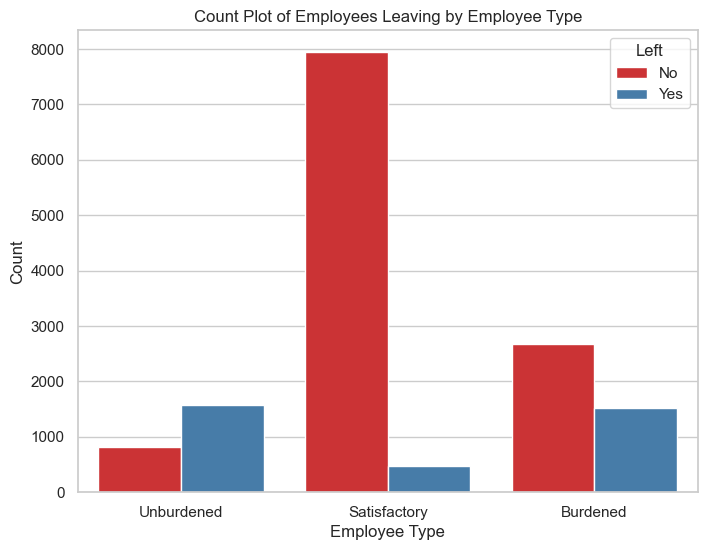

In [34]:
# Write code here
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='employee_type', hue='left', palette='Set1')

# Add labels and title
plt.xlabel('Employee Type')
plt.ylabel('Count')
plt.title('Count Plot of Employees Leaving by Employee Type')

# Show the plot
plt.legend(title='Left', labels=['No', 'Yes'])
plt.show()

### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [35]:
# Write code here
columns_to_remove = ['satisfaction_level', 'number_project']

# Drop the redundant columns
df = df.drop(columns=columns_to_remove)


# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 16: Do ONE HOT ENCODING of the above mentioned variables**

In [36]:
# Write code here
df_encoded = pd.get_dummies(df, columns=['dept', 'salary', 'satisfaction_level_type', 'employee_type'])

# Display the updated DataFrame with one-hot encoded columns
df_encoded.head(10)

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Unburdened,employee_type_Satisfactory,employee_type_Burdened
0,0.53,157,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,0.86,262,6,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,0.88,272,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,0.87,223,5,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0.52,159,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
5,0.50,153,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
6,0.77,247,4,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
7,0.85,259,5,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
8,1.00,224,5,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
9,0.53,142,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


**Task 17: Creating Independant and Dependant Variables**

In [37]:
# Write code here

X = df_encoded.drop(columns=['left'])  # Drop the 'left' column to get the features

Y = df_encoded['left']  # 'left' column is the target variable


**Task 18: Perform Train Test Split with test size 30 percent and random state = 100**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#Write code here
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)




X_train shape: (10499, 23)
X_test shape: (4500, 23)
Y_train shape: (10499,)
Y_test shape: (4500,)


In [40]:
#print(xtrain.shape, ytrain.shape)
#print(xtest.shape,ytest.shape)

**Task 19: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [41]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Making instance and training the model
clf_dt = RandomForestClassifier(
    max_depth=3, criterion='gini', random_state=100)

In [43]:
clf_dt.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, random_state=100)

In [44]:
# Get predictions

rf_pred = clf_dt.predict(X_test)
rf_pred_prb = clf_dt.predict_proba(X_test)[:, 1]

**Precision**

In [45]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score

In [46]:
#Write the code to calculate

rf_precision = precision_score(Y_test, rf_pred)
print("Precision: {}".format(rf_precision))

Precision: 0.9231805929919138


**Accuracy**

In [47]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score

In [48]:
# Write the code to calculate
rf_acc = accuracy_score(Y_test, rf_pred)
print("accuracy: {}".format(rf_acc))

accuracy: 0.8953333333333333


**Recall**

In [49]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score

In [50]:
# Write the code to calculate
rf_recall = recall_score(Y_test, rf_pred)
print("Recall: {}".format(rf_recall))

Recall: 0.6232939035486806


**F1-Score**

In [51]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score

In [90]:
# Write the code to calculate

rf_f1 = f1_score(Y_test, rf_pred)
print("F1-Score: {}".format(rf_f1))

F1-Score: 0.7441607821835959


**Classification Report**

In [53]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report

In [54]:
#Write the code to calculate
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3401
           1       0.92      0.62      0.74      1099

    accuracy                           0.90      4500
   macro avg       0.91      0.80      0.84      4500
weighted avg       0.90      0.90      0.89      4500



## Logistic Regression

In [55]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [56]:
# Create instance and train, random _state=100
clf_bt = LogisticRegression(random_state=100)

In [57]:
clf_bt.fit(X_train, Y_train)

C:\Users\opi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [58]:
# get the predictions

#lr_pred = clf_bt.predict(Y_test)
#lr_pred_prb = clf_bt.predict_proba(Y_test)[:, 1]

lr_pred = clf_bt.predict(X_test)

# Get predicted probabilities for class 1 from the Logistic Regression model
lr_pred_prb = clf_bt.predict_proba(X_test)[:, 1]

**Accuracy**

In [59]:
#Write the code here

lr_accuracy = accuracy_score(Y_test, lr_pred)
print("accuracy: {}".format(lr_accuracy))

accuracy: 0.8697777777777778


**Precision**

In [60]:
#Write the code here


lr_precision = precision_score(Y_test, lr_pred)

# Print the precision
print("Logistic Regression Precision:", lr_precision)

Logistic Regression Precision: 0.7577889447236181


**Recall**

In [61]:
#Write the code here
lr_recall = recall_score(Y_test, lr_pred)

# Print the recall
print("Logistic Regression Recall:", lr_recall)

Logistic Regression Recall: 0.6860782529572339


**F1 Score**

In [62]:
#Write the code here
lr_f1_score = f1_score(Y_test, lr_pred)

# Print the F1-score
print("Logistic Regression F1-Score:", lr_f1_score)

Logistic Regression F1-Score: 0.720152817574021


**Classification Report**

In [63]:
#Write the code here
lr_classification_report = classification_report(Y_test, lr_pred)

# Print the classification report
print("Logistic Regression Classification Report:\n", lr_classification_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      3401
           1       0.76      0.69      0.72      1099

    accuracy                           0.87      4500
   macro avg       0.83      0.81      0.82      4500
weighted avg       0.87      0.87      0.87      4500



## Ada Boost

In [64]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier

In [65]:
#Write the code here to make an instance and train the model with random state =100
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(X_train, Y_train)

AdaBoostClassifier(random_state=100)

In [66]:
# Get the predictions

pred_clf_adb = clf_adb.predict(X_test)

In [67]:
adb_pred_prb = clf_adb.predict_proba(X_test)[:, 1]

**Accuracy**

In [68]:
#Write code here

adb_accuracy = accuracy_score(Y_test, pred_clf_adb)

# Print the accuracy
print("AdaBoostClassifier Accuracy:", adb_accuracy)

AdaBoostClassifier Accuracy: 0.9266666666666666


**Precision**

In [69]:
#Write code here
adb_precision = precision_score(Y_test, pred_clf_adb)

# Print the precision
print("AdaBoostClassifier Precision:", adb_precision)

AdaBoostClassifier Precision: 0.8524289642529789


**Recall**

In [70]:
#Write code here
adb_recall = recall_score(Y_test, pred_clf_adb)
print("AdaBoostClassifier Recall:", adb_recall)

AdaBoostClassifier Recall: 0.8462238398544131


**F1-Score**

In [71]:
#Write code here
adb_f1_score = f1_score(Y_test, pred_clf_adb)
print("AdaBoostClassifier F1-Score:", adb_f1_score)

AdaBoostClassifier F1-Score: 0.8493150684931506


**Classification Report**

In [72]:
#Write code here
lr_classification_report = classification_report(Y_test, pred_clf_adb)

# Print the classification report
print("Logistic Regression Classification Report:\n", lr_classification_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      3401
           1       0.85      0.85      0.85      1099

    accuracy                           0.93      4500
   macro avg       0.90      0.90      0.90      4500
weighted avg       0.93      0.93      0.93      4500



## XG Boost

In [73]:
#!pip install xgboost

In [74]:
#Write the code here to import the model
import xgboost as xgb

In [75]:
#Write the code here to make an instance and train the model with random state =100
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)

In [76]:
# Get the predictions
#clf_xgb=None
clf_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=1, num_parallel_tree=None,
              predictor=None, ...)

**Accuracy**

In [77]:
#Write code here
xgb_pred = clf_xgb.predict(X_test)

# Calculate the accuracy for XGBoost Classifier
xgb_accuracy = accuracy_score(Y_test, xgb_pred)

# Print the accuracy
print("XGBoost Classifier Accuracy:", xgb_accuracy)

XGBoost Classifier Accuracy: 0.9806666666666667


**Precision**

In [78]:
#Write code here

xgb_precision = precision_score(Y_test, xgb_pred)


# Print the precision and recall
print("XGBoost Classifier Precision:", xgb_precision)


XGBoost Classifier Precision: 0.9642201834862385


**Recall**

In [79]:
#Write code here

# Calculate the recall for XGBoost Classifier
xgb_recall = recall_score(Y_test, xgb_pred)
print("XGBoost Classifier Recall:", xgb_recall)

XGBoost Classifier Recall: 0.9563239308462238


**F1-Score**

In [80]:
#Write code here


# Calculate the F1-score for XGBoost Classifier
xgb_f1_score = f1_score(Y_test, xgb_pred)

# Print the F1-score
print("XGBoost Classifier F1-Score:", xgb_f1_score)

XGBoost Classifier F1-Score: 0.9602558245774326


**Classification Report**

In [81]:
#Write code here
lr_classification_report = classification_report(Y_test, xgb_pred)

# Print the classification report
print("Logistic Regression Classification Report:\n", lr_classification_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.96      0.96      0.96      1099

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



# Result Comparisons

**Task 20: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [92]:
# Write the code here

# Calculate scores for Random Forest
rf_accuracy = accuracy_score(Y_test, rf_pred)
rf_precision = precision_score(Y_test, rf_pred)
rf_recall = recall_score(Y_test, rf_pred)
rf_f1_score = f1_score(Y_test, rf_pred)

# Calculate scores for Logistic Regression
lr_accuracy = accuracy_score(Y_test, lr_pred)
lr_precision = precision_score(Y_test, lr_pred)
lr_recall = recall_score(Y_test, lr_pred)
lr_f1_score = f1_score(Y_test, lr_pred)

# Calculate scores for AdaBoost
adb_accuracy = accuracy_score(Y_test, pred_clf_adb)
adb_precision = precision_score(Y_test, pred_clf_adb)
adb_recall = recall_score(Y_test, pred_clf_adb)
adb_f1_score = f1_score(Y_test, pred_clf_adb)

# Calculate scores for XGBoost
xgb_accuracy = accuracy_score(Y_test, clf_xgb.predict(X_test))
xgb_precision = precision_score(Y_test, clf_xgb.predict(X_test))
xgb_recall = recall_score(Y_test, clf_xgb.predict(X_test))
xgb_f1_score = f1_score(Y_test, clf_xgb.predict(X_test))

models_scores = {
    'Model': ['Random Forest', 'Logistic Regression', 'AdaBoost', 'XGBoost'],
    'Accuracy': [rf_accuracy, lr_accuracy, adb_accuracy, xgb_accuracy],
    'Precision': [rf_precision, lr_precision, adb_precision, xgb_precision],
    'Recall': [rf_recall, lr_recall, adb_recall, xgb_recall],
    'F1-Score': [rf_f1, lr_f1_score, adb_f1_score, xgb_f1_score]
}

df = pd.DataFrame(models_scores)
print(df)



                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.895333   0.923181  0.623294  0.744161
1  Logistic Regression  0.869778   0.757789  0.686078  0.720153
2             AdaBoost  0.926667   0.852429  0.846224  0.849315
3              XGBoost  0.980667   0.964220  0.956324  0.960256


**Task 21: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

Answer: 

Based on the provided scores, the "XGBoost" model appears to have the best overall performance across all metrics (Accuracy, Precision, Recall, and F1-Score). It has the highest values for Accuracy, Precision, Recall, and F1-Score among all the models.
no i dont need yo apply any sort of tuning.